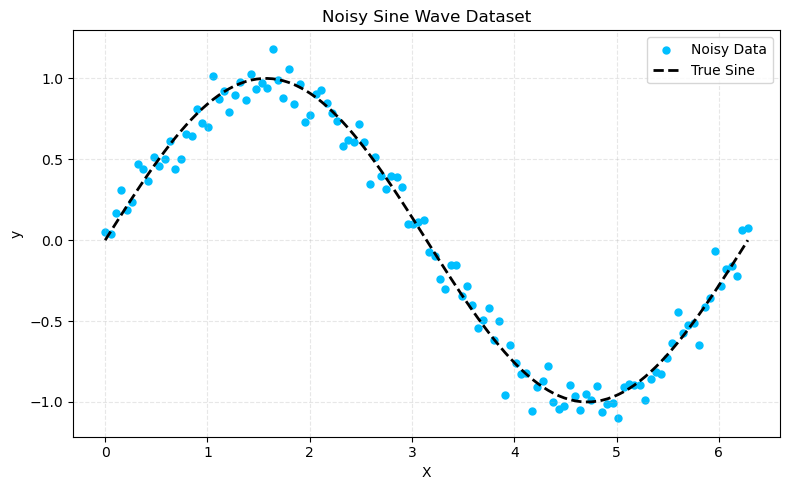

Model Performance Metrics:

Linear Regression:
  MSE: 0.2035
  R² Score: 0.5845

Polynomial Regression:
  MSE: 0.0131
  R² Score: 0.9732

Random Forest Regression:
  MSE: 0.0051
  R² Score: 0.9897

MLP Regression:
  MSE: 0.0223
  R² Score: 0.9545



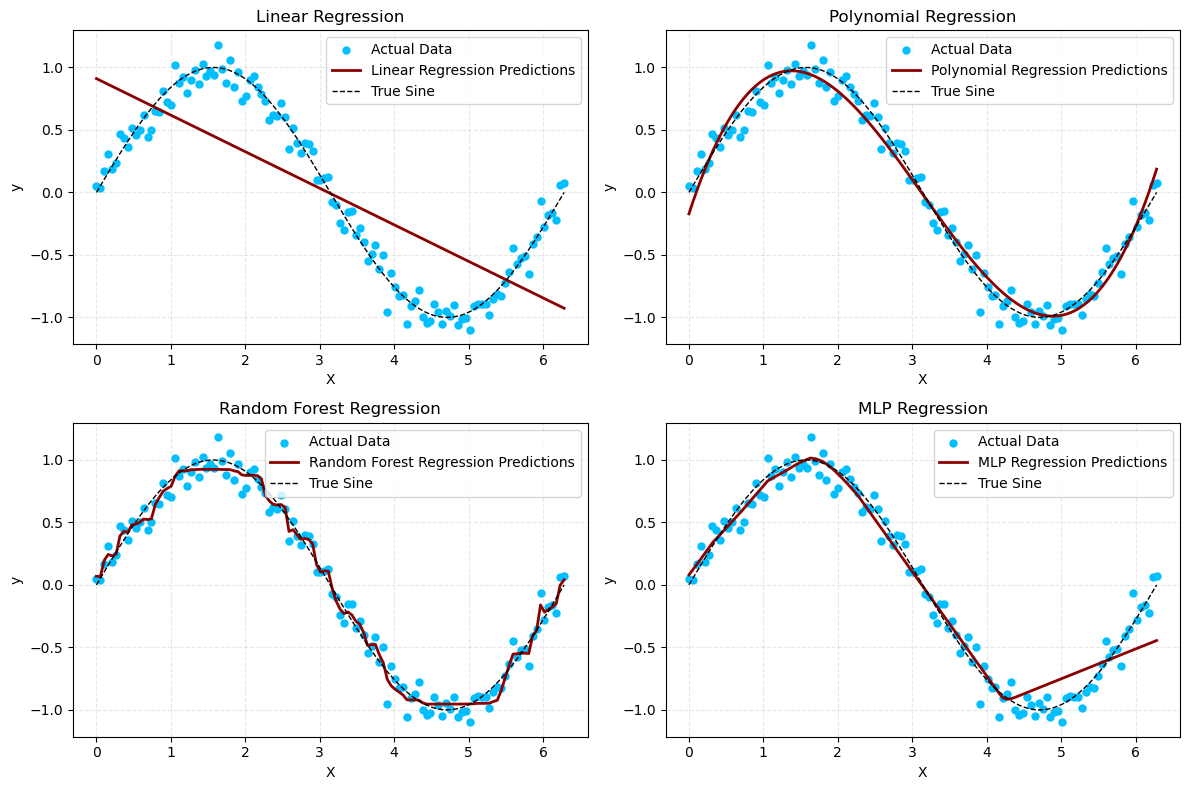

Plots saved as 'sine_data.png' and 'regression_comparison.png'


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset
X = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 120)

# Plot dataset
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='deepskyblue', label='Noisy Data', s=25)
plt.plot(X, np.sin(X), color='black', linestyle='--', label='True Sine', linewidth=2)
plt.title('Noisy Sine Wave Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('sine_data.png')
plt.show()
plt.close()

# Initialize and train models
linear_reg = LinearRegression()
polyreg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', 
                       max_iter=2000, random_state=42)

linear_reg.fit(X, y)
polyreg.fit(X, y)
rf_reg.fit(X, y)
mlp_reg.fit(X, y)

# Make predictions
y_pred_linear = linear_reg.predict(X)
y_pred_poly = polyreg.predict(X)
y_pred_rf = rf_reg.predict(X)
y_pred_mlp = mlp_reg.predict(X)

# Evaluate models
models = {
    'Linear Regression': y_pred_linear,
    'Polynomial Regression': y_pred_poly,
    'Random Forest Regression': y_pred_rf,
    'MLP Regression': y_pred_mlp
}

print('Model Performance Metrics:\n')
for name, y_pred in models.items():
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{name}:')
    print(f'  MSE: {mse:.4f}')
    print(f'  R² Score: {r2:.4f}\n')

# Plot predictions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(models.items()):
    axes[idx].scatter(X, y, color='deepskyblue', label='Actual Data', s=25)
    axes[idx].plot(X, y_pred, color='darkred', label=f'{name} Predictions', linewidth=2)
    axes[idx].plot(X, np.sin(X), color='black', linestyle='--', label='True Sine', linewidth=1)
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('y')
    axes[idx].legend()
    axes[idx].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('regression_comparison.png')
plt.show()
plt.close()

print("Plots saved as 'sine_data.png' and 'regression_comparison.png'")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings for cleaner output

# Common setup for examples
def generate_sample_data(n_samples=200, n_features=3):
    """Generate sample data for regression examples"""
    np.random.seed(42)
    X = np.random.rand(n_samples, n_features)
    # Create a target with some noise
    y = 3 + 2*X[:, 0] + 5*X[:, 1]**2 - 1*X[:, 2] + np.random.randn(n_samples)*0.5
    return X, y

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance"""
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 40)
    return mse, r2

# Generate dataset for examples
X, y = generate_sample_data(n_samples=200, n_features=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset shape - X:", X.shape, "y:", y.shape)

#------------------------------------------------------------------------------
# 1. SIMPLE LINEAR REGRESSION
#------------------------------------------------------------------------------
print("\n1. SIMPLE LINEAR REGRESSION")
from sklearn.linear_model import LinearRegression

# Using only one feature for simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train[:, 0].reshape(-1, 1), y_train)
y_pred = simple_model.predict(X_test[:, 0].reshape(-1, 1))

print(f"Coefficient: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Simple Linear Regression")

#------------------------------------------------------------------------------
# 2. MULTIPLE LINEAR REGRESSION
#------------------------------------------------------------------------------
print("\n2. MULTIPLE LINEAR REGRESSION")
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

print(f"Coefficients: {multi_model.coef_}")
print(f"Intercept: {multi_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Multiple Linear Regression")

#------------------------------------------------------------------------------
# 3. POLYNOMIAL REGRESSION
#------------------------------------------------------------------------------
print("\n3. POLYNOMIAL REGRESSION")
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred = poly_model.predict(X_test_poly)

print(f"Number of coefficients: {len(poly_model.coef_)}")
print(f"Intercept: {poly_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Polynomial Regression (degree={degree})")

#------------------------------------------------------------------------------
# 4. RIDGE REGRESSION
#------------------------------------------------------------------------------
print("\n4. RIDGE REGRESSION")
from sklearn.linear_model import Ridge

alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Ridge Regression (alpha={alpha})")

#------------------------------------------------------------------------------
# 5. LASSO REGRESSION
#------------------------------------------------------------------------------
print("\n5. LASSO REGRESSION")
from sklearn.linear_model import Lasso

alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"Coefficients: {lasso_model.coef_}")
print(f"Intercept: {lasso_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Lasso Regression (alpha={alpha})")

#------------------------------------------------------------------------------
# 6. ELASTIC NET REGRESSION
#------------------------------------------------------------------------------
print("\n6. ELASTIC NET REGRESSION")
from sklearn.linear_model import ElasticNet

alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Ratio of L1 regularization
elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_model.fit(X_train, y_train)
y_pred = elastic_model.predict(X_test)

print(f"Coefficients: {elastic_model.coef_}")
print(f"Intercept: {elastic_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Elastic Net (alpha={alpha}, l1_ratio={l1_ratio})")

#------------------------------------------------------------------------------
# 7. DECISION TREE REGRESSION
#------------------------------------------------------------------------------
print("\n7. DECISION TREE REGRESSION")
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(f"Feature importances: {tree_model.feature_importances_}")
evaluate_model(y_test, y_pred, "Decision Tree Regression")

#------------------------------------------------------------------------------
# 8. RANDOM FOREST REGRESSION
#------------------------------------------------------------------------------
print("\n8. RANDOM FOREST REGRESSION")
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Feature importances: {rf_model.feature_importances_}")
evaluate_model(y_test, y_pred, "Random Forest Regression")

#------------------------------------------------------------------------------
# 9. SUPPORT VECTOR REGRESSION
#------------------------------------------------------------------------------
print("\n9. SUPPORT VECTOR REGRESSION")
from sklearn.svm import SVR

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Support Vector Regression")

#------------------------------------------------------------------------------
# 10. K-NEAREST NEIGHBORS REGRESSION
#------------------------------------------------------------------------------
print("\n10. K-NEAREST NEIGHBORS REGRESSION")
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

evaluate_model(y_test, y_pred, "K-Nearest Neighbors Regression")

#------------------------------------------------------------------------------
# 11. NEURAL NETWORK REGRESSION
#------------------------------------------------------------------------------
print("\n11. NEURAL NETWORK REGRESSION")
from sklearn.neural_network import MLPRegressor

# Scale features for neural network
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), 
                        activation='relu', 
                        solver='adam', 
                        alpha=0.001,
                        max_iter=1000,
                        random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred = nn_model.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Neural Network Regression")

#------------------------------------------------------------------------------
# 12. GAUSSIAN PROCESS REGRESSION
#------------------------------------------------------------------------------
print("\n12. GAUSSIAN PROCESS REGRESSION")
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Use a smaller subset for Gaussian Process (can be slow)
subset_size = min(50, len(X_train))
X_train_sub = X_train_scaled[:subset_size]
y_train_sub = y_train[:subset_size]

# Define kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gp_model.fit(X_train_sub, y_train_sub)
y_pred, std_pred = gp_model.predict(X_test_scaled, return_std=True)

evaluate_model(y_test, y_pred, "Gaussian Process Regression")
print(f"Mean predicted std: {np.mean(std_pred):.4f}")

#------------------------------------------------------------------------------
# 13. BAYESIAN REGRESSION
#------------------------------------------------------------------------------
print("\n13. BAYESIAN REGRESSION")
from sklearn.linear_model import BayesianRidge

bayesian_model = BayesianRidge(max_iter=300, alpha_1=1e-6, alpha_2=1e-6)
bayesian_model.fit(X_train, y_train)
y_pred = bayesian_model.predict(X_test)

print(f"Coefficients: {bayesian_model.coef_}")
print(f"Intercept: {bayesian_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Bayesian Ridge Regression")

#------------------------------------------------------------------------------
# 14. QUANTILE REGRESSION
#------------------------------------------------------------------------------
print("\n14. QUANTILE REGRESSION")
# Using sklearn's QuantileRegressor if available (newer versions)
try:
    from sklearn.linear_model import QuantileRegressor
    
    quantile_model = QuantileRegressor(quantile=0.5, alpha=0.1)
    quantile_model.fit(X_train, y_train)
    y_pred = quantile_model.predict(X_test)
    
    print(f"Coefficients: {quantile_model.coef_}")
    evaluate_model(y_test, y_pred, "Quantile Regression (median)")
except ImportError:
    # For older scikit-learn versions, use statsmodels
    import statsmodels.api as sm
    
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)
    
    quantile_model = sm.QuantReg(y_train, X_train_sm).fit(q=0.5)
    y_pred = quantile_model.predict(X_test_sm)
    
    print("Statsmodels QuantReg Summary:")
    print("Coefficients:", quantile_model.params)
    evaluate_model(y_test, y_pred, "Quantile Regression (statsmodels)")

#------------------------------------------------------------------------------
# 15. POISSON REGRESSION
#------------------------------------------------------------------------------
print("\n15. POISSON REGRESSION")
from sklearn.linear_model import PoissonRegressor

# Generate count data for Poisson regression
np.random.seed(42)
X_count, y_count_orig = generate_sample_data(n_samples=200, n_features=3)
y_count = np.round(np.abs(y_count_orig))  # Convert to non-negative integers

X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(
    X_count, y_count, test_size=0.2, random_state=42)

poisson_model = PoissonRegressor(alpha=0.01)
poisson_model.fit(X_count_train, y_count_train)
y_pred = poisson_model.predict(X_count_test)

print(f"Coefficients: {poisson_model.coef_}")
evaluate_model(y_count_test, y_pred, "Poisson Regression")

#------------------------------------------------------------------------------
# 16. NEGATIVE BINOMIAL REGRESSION
#------------------------------------------------------------------------------
print("\n16. NEGATIVE BINOMIAL REGRESSION")
# Using statsmodels for Negative Binomial Regression
try:
    import statsmodels.api as sm
    
    X_train_sm = sm.add_constant(X_count_train)
    X_test_sm = sm.add_constant(X_count_test)
    
    # Set alpha parameter explicitly to avoid warning
    family = sm.families.NegativeBinomial(alpha=1.0)
    nb_model = sm.GLM(y_count_train, X_train_sm, family=family)
    nb_results = nb_model.fit()
    y_pred = nb_results.predict(X_test_sm)
    
    print("Coefficient estimates:")
    for name, value in zip(['const', 'x1', 'x2', 'x3'], nb_results.params):
        print(f"  {name}: {value:.4f}")
    evaluate_model(y_count_test, y_pred, "Negative Binomial Regression")
except Exception as e:
    print(f"Error with Negative Binomial Regression: {e}")

#------------------------------------------------------------------------------
# 17. ORDINAL REGRESSION
#------------------------------------------------------------------------------
print("\n17. ORDINAL REGRESSION")
# Using scikit-learn's LogisticRegression for ordinal data
from sklearn.linear_model import LogisticRegression

# Create ordinal target (0-4 categories)
np.random.seed(42)
y_ord = np.random.randint(0, 5, size=len(y))
y_ord_train, y_ord_test = train_test_split(y_ord, test_size=0.2, random_state=42)

# Using LogisticRegression (not truly ordinal, but can work)
ordinal_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
ordinal_model.fit(X_train, y_ord_train)
y_pred = ordinal_model.predict(X_test)

# Custom accuracy for ordinal data
accuracy = np.mean(y_pred == y_ord_test)
mae = np.mean(np.abs(y_pred - y_ord_test))
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean absolute error: {mae:.4f}")
print("-" * 40)

#------------------------------------------------------------------------------
# 18. TIME SERIES REGRESSION
#------------------------------------------------------------------------------
print("\n18. TIME SERIES REGRESSION")
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate a simple time series
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(date_rng)
trend = np.linspace(0, 20, n)
season = 10 * np.sin(2 * np.pi * np.arange(n) / 365.25)
noise = np.random.normal(0, 1, n)
ts = trend + season + noise

# Create DataFrame with explicit frequency
df = pd.DataFrame({'date': date_rng, 'value': ts})
df.set_index('date', inplace=True)
df.index.freq = 'D'  # Set frequency explicitly

# Split into train and test
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# 18.1 ARIMA Model
try:
    # Fit ARIMA model
    arima_model = ARIMA(train_data, order=(2, 1, 2))
    arima_results = arima_model.fit()
    
    # Make predictions
    arima_preds = arima_results.predict(start=test_data.index[0], end=test_data.index[-1])
    
    # Evaluate
    arima_mse = mean_squared_error(test_data, arima_preds)
    print(f"ARIMA Model - MSE: {arima_mse:.4f}")
except Exception as e:
    print(f"Error with ARIMA model: {e}")

# 18.2 SARIMA Model
try:
    # Fit SARIMA model
    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)
    
    # Make predictions
    sarima_preds = sarima_results.predict(start=test_data.index[0], end=test_data.index[-1])
    
    # Evaluate
    sarima_mse = mean_squared_error(test_data, sarima_preds)
    print(f"SARIMA Model - MSE: {sarima_mse:.4f}")
except Exception as e:
    print(f"Error with SARIMA model: {e}")

print("-" * 40)

#------------------------------------------------------------------------------
# 19. GRADIENT BOOSTING REGRESSION
#------------------------------------------------------------------------------
print("\n19. GRADIENT BOOSTING REGRESSION")
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print(f"Feature importances: {gb_model.feature_importances_}")
evaluate_model(y_test, y_pred, "Gradient Boosting Regression")

#------------------------------------------------------------------------------
# 20. XGBoost REGRESSION (if available)
#------------------------------------------------------------------------------
print("\n20. XGBoost REGRESSION")
try:
    from xgboost import XGBRegressor
    
    xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    print(f"Feature importances: {xgb_model.feature_importances_}")
    evaluate_model(y_test, y_pred, "XGBoost Regression")
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")

#------------------------------------------------------------------------------
# 21. LightGBM REGRESSION (if available)
#------------------------------------------------------------------------------
print("\n21. LightGBM REGRESSION")
try:
    from lightgbm import LGBMRegressor
    
    # Set verbose=-1 to suppress warnings
    lgbm_model = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, 
                               random_state=42, verbose=-1)
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)
    
    print(f"Feature importances: {lgbm_model.feature_importances_}")
    evaluate_model(y_test, y_pred, "LightGBM Regression")
except ImportError:
    print("LightGBM not installed. Install with: pip install lightgbm")

#------------------------------------------------------------------------------
# 22. CatBoost REGRESSION (if available)
#------------------------------------------------------------------------------
print("\n22. CatBoost REGRESSION")
try:
    from catboost import CatBoostRegressor
    
    cat_model = CatBoostRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, 
                                  random_state=42, verbose=0)
    cat_model.fit(X_train, y_train)
    y_pred = cat_model.predict(X_test)
    
    print(f"Feature importances: {cat_model.feature_importances_}")
    evaluate_model(y_test, y_pred, "CatBoost Regression")
except ImportError:
    print("CatBoost not installed. Install with: pip install catboost")

#------------------------------------------------------------------------------
# 23. HUBER REGRESSION (Robust Regression)
#------------------------------------------------------------------------------
print("\n23. HUBER REGRESSION")
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor(epsilon=1.35, alpha=0.0001, max_iter=100)
huber_model.fit(X_train, y_train)
y_pred = huber_model.predict(X_test)

print(f"Coefficients: {huber_model.coef_}")
print(f"Intercept: {huber_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Huber Regression")

#------------------------------------------------------------------------------
# 24. THEIL-SEN REGRESSION (Robust Regression)
#------------------------------------------------------------------------------
print("\n24. THEIL-SEN REGRESSION")
from sklearn.linear_model import TheilSenRegressor

theil_model = TheilSenRegressor(random_state=42)
theil_model.fit(X_train, y_train)
y_pred = theil_model.predict(X_test)

print(f"Coefficients: {theil_model.coef_}")
print(f"Intercept: {theil_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Theil-Sen Regression")

#------------------------------------------------------------------------------
# 25. RANSAC REGRESSION (Robust Regression)
#------------------------------------------------------------------------------
print("\n25. RANSAC REGRESSION")
from sklearn.linear_model import RANSACRegressor

ransac_model = RANSACRegressor(random_state=42)
ransac_model.fit(X_train, y_train)
y_pred = ransac_model.predict(X_test)

if hasattr(ransac_model.estimator_, 'coef_'):
    print(f"Coefficients: {ransac_model.estimator_.coef_}")
    print(f"Intercept: {ransac_model.estimator_.intercept_:.4f}")
evaluate_model(y_test, y_pred, "RANSAC Regression")

#------------------------------------------------------------------------------
# PERFORMANCE COMPARISON
#------------------------------------------------------------------------------
print("\n--- PERFORMANCE COMPARISON ---")
model_results = {}

# Collect results from all models
model_results["Simple Linear Regression"] = evaluate_model(y_test, simple_model.predict(X_test[:, 0].reshape(-1, 1)), "")
model_results["Multiple Linear Regression"] = evaluate_model(y_test, multi_model.predict(X_test), "")
model_results["Polynomial Regression"] = evaluate_model(y_test, poly_model.predict(X_test_poly), "")
model_results["Ridge Regression"] = evaluate_model(y_test, ridge_model.predict(X_test), "")
model_results["Lasso Regression"] = evaluate_model(y_test, lasso_model.predict(X_test), "")
model_results["Elastic Net"] = evaluate_model(y_test, elastic_model.predict(X_test), "")
model_results["Decision Tree"] = evaluate_model(y_test, tree_model.predict(X_test), "")
model_results["Random Forest"] = evaluate_model(y_test, rf_model.predict(X_test), "")
model_results["SVR"] = evaluate_model(y_test, svr_model.predict(X_test_scaled), "")
model_results["KNN"] = evaluate_model(y_test, knn_model.predict(X_test), "")
model_results["Neural Network"] = evaluate_model(y_test, nn_model.predict(X_test_scaled), "")
model_results["Gaussian Process"] = evaluate_model(y_test, gp_model.predict(X_test_scaled), "")
model_results["Bayesian Ridge"] = evaluate_model(y_test, bayesian_model.predict(X_test), "")
model_results["Huber Regression"] = evaluate_model(y_test, huber_model.predict(X_test), "")
model_results["Theil-Sen Regression"] = evaluate_model(y_test, theil_model.predict(X_test), "")
model_results["RANSAC Regression"] = evaluate_model(y_test, ransac_model.predict(X_test), "")
model_results["Gradient Boosting"] = evaluate_model(y_test, gb_model.predict(X_test), "")

# Sort by MSE (lower is better)
sorted_models = sorted(model_results.items(), key=lambda x: x[1][0])
print("\nModel performance ranked by MSE (lower is better):")
for i, (model_name, (mse, r2)) in enumerate(sorted_models, 1):
    print(f"{i}. {model_name}: MSE={mse:.4f}, R²={r2:.4f}")

Dataset shape - X: (200, 3) y: (200,)

1. SIMPLE LINEAR REGRESSION
Coefficient: 2.3138
Intercept: 4.0406
Simple Linear Regression Results:
  MSE: 2.9882
  R²: 0.1309
----------------------------------------

2. MULTIPLE LINEAR REGRESSION
Coefficients: [ 1.97855843  4.82170493 -0.99435202]
Intercept: 2.2693
Multiple Linear Regression Results:
  MSE: 0.3965
  R²: 0.8847
----------------------------------------

3. POLYNOMIAL REGRESSION
Number of coefficients: 10
Intercept: 2.9600
Polynomial Regression (degree=2) Results:
  MSE: 0.1853
  R²: 0.9461
----------------------------------------

4. RIDGE REGRESSION
Coefficients: [ 1.85693665  4.51158703 -0.90492312]
Intercept: 2.4429
Ridge Regression (alpha=1.0) Results:
  MSE: 0.4438
  R²: 0.8709
----------------------------------------

5. LASSO REGRESSION
Coefficients: [ 0.78962227  3.7390882  -0.        ]
Intercept: 2.9305
Lasso Regression (alpha=0.1) Results:
  MSE: 0.9005
  R²: 0.7381
----------------------------------------

6. ELASTIC N

Dataset shape - X: (200, 3) y: (200,)

1. SIMPLE LINEAR REGRESSION
Coefficient: 2.3138
Intercept: 4.0406
Simple Linear Regression Results:
  MSE: 2.9882
  R²: 0.1309
----------------------------------------

2. MULTIPLE LINEAR REGRESSION
Coefficients: [ 1.97855843  4.82170493 -0.99435202]
Intercept: 2.2693
Multiple Linear Regression Results:
  MSE: 0.3965
  R²: 0.8847
----------------------------------------

3. POLYNOMIAL REGRESSION
Number of coefficients: 10
Intercept: 2.9600
Polynomial Regression (degree=2) Results:
  MSE: 0.1853
  R²: 0.9461
----------------------------------------

4. RIDGE REGRESSION
Coefficients: [ 1.85693665  4.51158703 -0.90492312]
Intercept: 2.4429
Ridge Regression (alpha=1.0) Results:
  MSE: 0.4438
  R²: 0.8709
----------------------------------------

5. LASSO REGRESSION
Coefficients: [ 0.78962227  3.7390882  -0.        ]
Intercept: 2.9305
Lasso Regression (alpha=0.1) Results:
  MSE: 0.9005
  R²: 0.7381
----------------------------------------

6. ELASTIC N

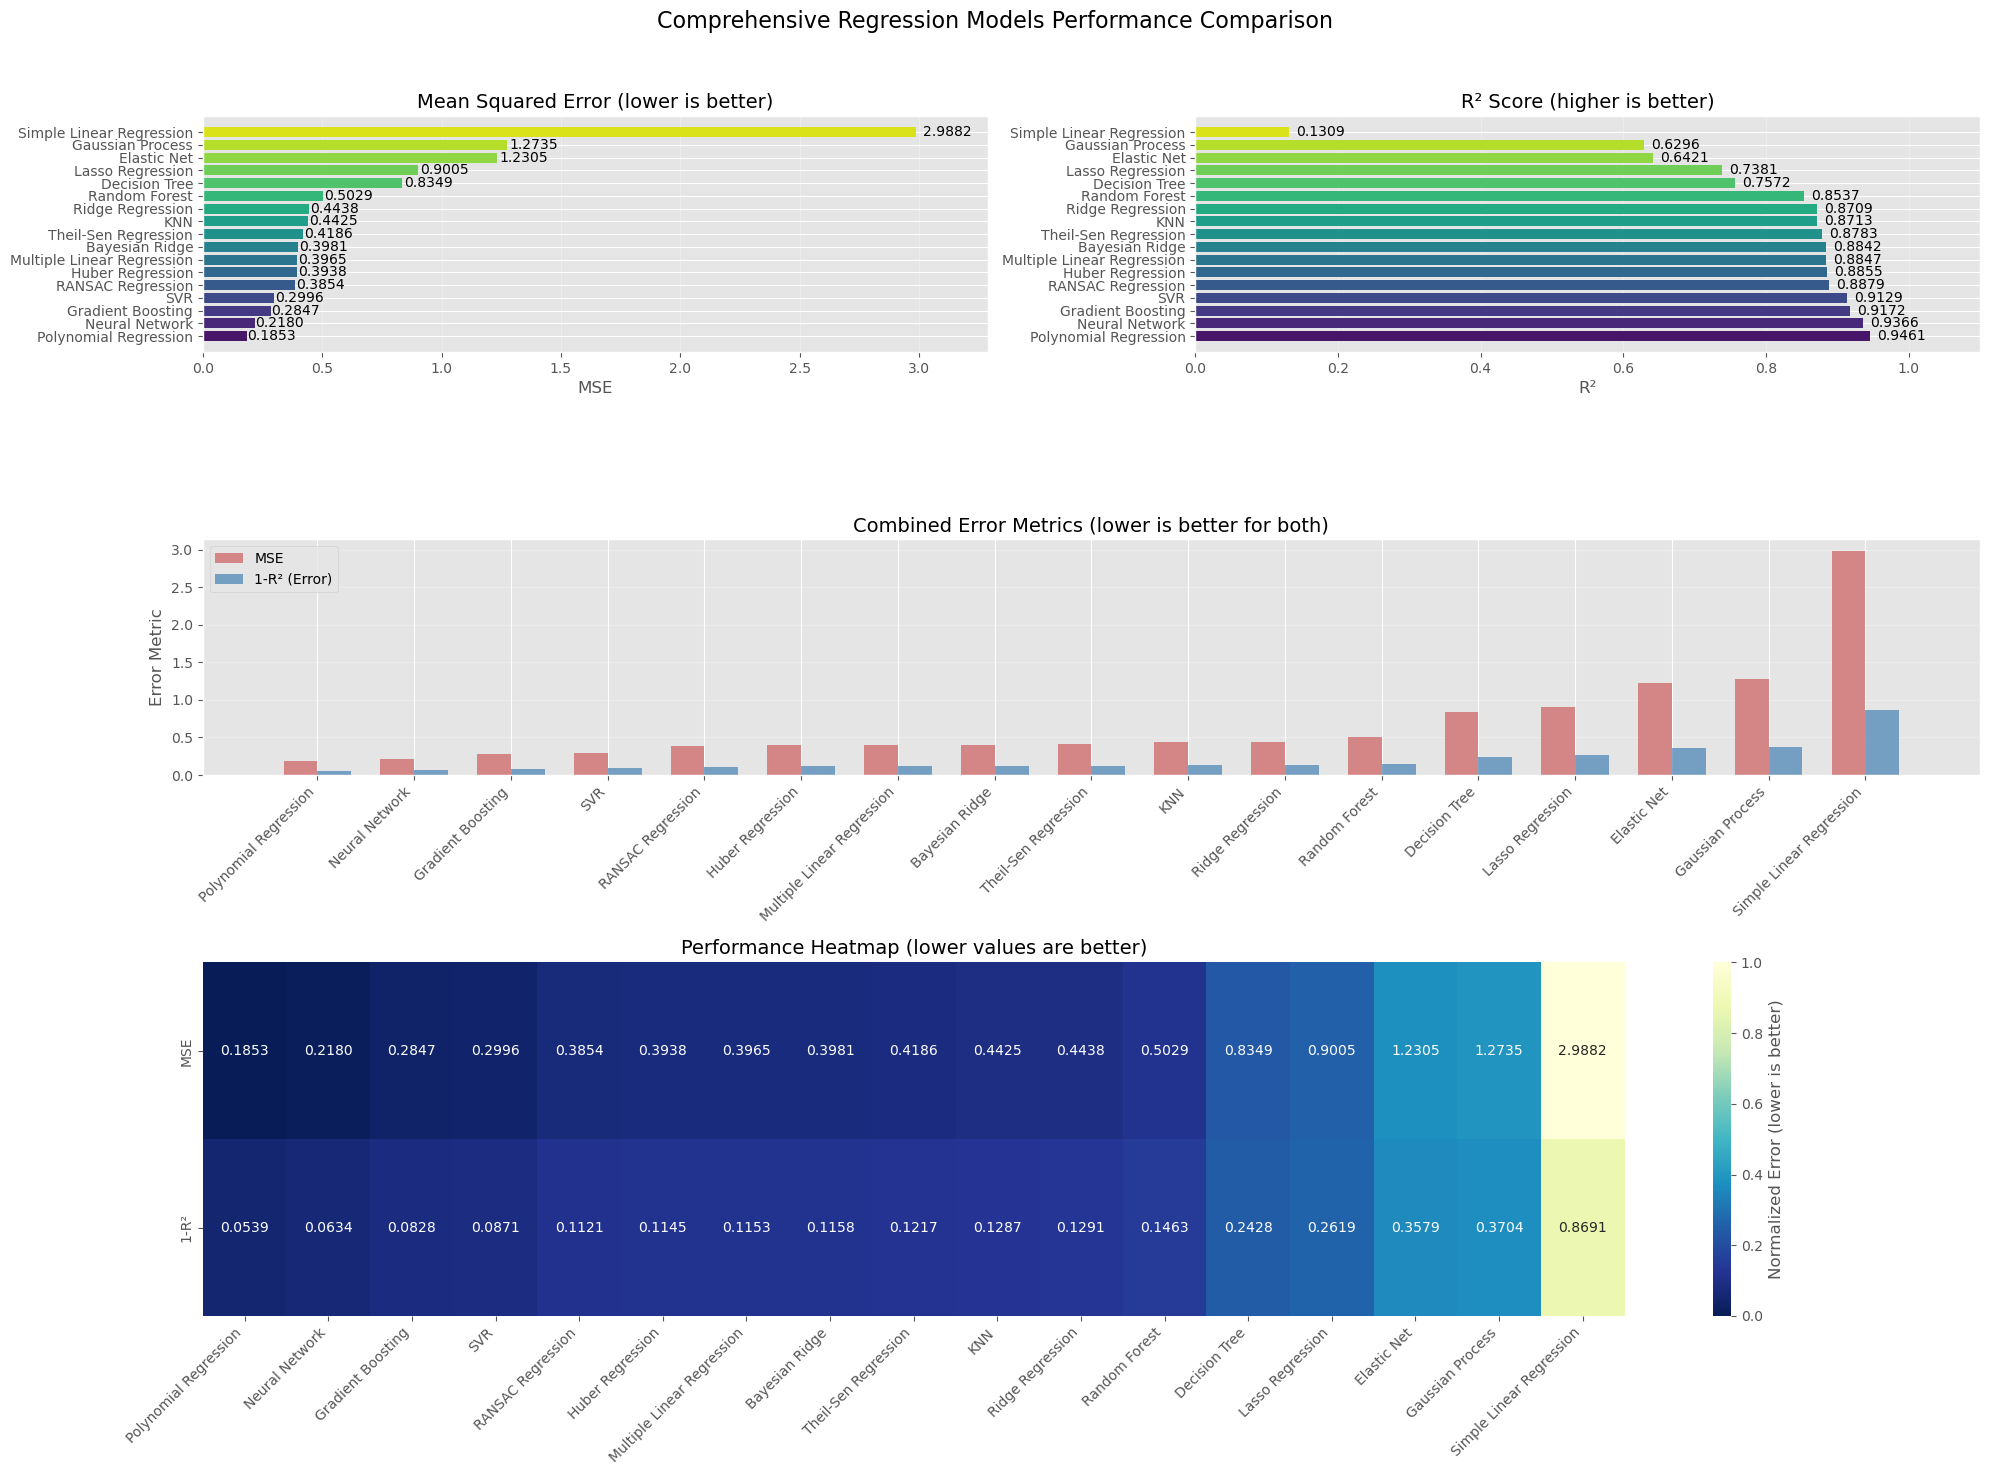

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings for cleaner output

# Common setup for examples
def generate_sample_data(n_samples=200, n_features=3):
    """Generate sample data for regression examples"""
    np.random.seed(42)
    X = np.random.rand(n_samples, n_features)
    # Create a target with some noise
    y = 3 + 2*X[:, 0] + 5*X[:, 1]**2 - 1*X[:, 2] + np.random.randn(n_samples)*0.5
    return X, y

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance"""
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 40)
    return mse, r2

# Generate dataset for examples
X, y = generate_sample_data(n_samples=200, n_features=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset shape - X:", X.shape, "y:", y.shape)

#------------------------------------------------------------------------------
# 1. SIMPLE LINEAR REGRESSION
#------------------------------------------------------------------------------
print("\n1. SIMPLE LINEAR REGRESSION")
from sklearn.linear_model import LinearRegression

# Using only one feature for simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train[:, 0].reshape(-1, 1), y_train)
y_pred = simple_model.predict(X_test[:, 0].reshape(-1, 1))

print(f"Coefficient: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Simple Linear Regression")

#------------------------------------------------------------------------------
# 2. MULTIPLE LINEAR REGRESSION
#------------------------------------------------------------------------------
print("\n2. MULTIPLE LINEAR REGRESSION")
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

print(f"Coefficients: {multi_model.coef_}")
print(f"Intercept: {multi_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Multiple Linear Regression")

#------------------------------------------------------------------------------
# 3. POLYNOMIAL REGRESSION
#------------------------------------------------------------------------------
print("\n3. POLYNOMIAL REGRESSION")
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred = poly_model.predict(X_test_poly)

print(f"Number of coefficients: {len(poly_model.coef_)}")
print(f"Intercept: {poly_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Polynomial Regression (degree={degree})")

#------------------------------------------------------------------------------
# 4. RIDGE REGRESSION
#------------------------------------------------------------------------------
print("\n4. RIDGE REGRESSION")
from sklearn.linear_model import Ridge

alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Ridge Regression (alpha={alpha})")

#------------------------------------------------------------------------------
# 5. LASSO REGRESSION
#------------------------------------------------------------------------------
print("\n5. LASSO REGRESSION")
from sklearn.linear_model import Lasso

alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"Coefficients: {lasso_model.coef_}")
print(f"Intercept: {lasso_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Lasso Regression (alpha={alpha})")

#------------------------------------------------------------------------------
# 6. ELASTIC NET REGRESSION
#------------------------------------------------------------------------------
print("\n6. ELASTIC NET REGRESSION")
from sklearn.linear_model import ElasticNet

alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Ratio of L1 regularization
elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_model.fit(X_train, y_train)
y_pred = elastic_model.predict(X_test)

print(f"Coefficients: {elastic_model.coef_}")
print(f"Intercept: {elastic_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, f"Elastic Net (alpha={alpha}, l1_ratio={l1_ratio})")

#------------------------------------------------------------------------------
# 7. DECISION TREE REGRESSION
#------------------------------------------------------------------------------
print("\n7. DECISION TREE REGRESSION")
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(f"Feature importances: {tree_model.feature_importances_}")
evaluate_model(y_test, y_pred, "Decision Tree Regression")

#------------------------------------------------------------------------------
# 8. RANDOM FOREST REGRESSION
#------------------------------------------------------------------------------
print("\n8. RANDOM FOREST REGRESSION")
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Feature importances: {rf_model.feature_importances_}")
evaluate_model(y_test, y_pred, "Random Forest Regression")

#------------------------------------------------------------------------------
# 9. SUPPORT VECTOR REGRESSION
#------------------------------------------------------------------------------
print("\n9. SUPPORT VECTOR REGRESSION")
from sklearn.svm import SVR

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Support Vector Regression")

#------------------------------------------------------------------------------
# 10. K-NEAREST NEIGHBORS REGRESSION
#------------------------------------------------------------------------------
print("\n10. K-NEAREST NEIGHBORS REGRESSION")
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

evaluate_model(y_test, y_pred, "K-Nearest Neighbors Regression")

#------------------------------------------------------------------------------
# 11. NEURAL NETWORK REGRESSION
#------------------------------------------------------------------------------
print("\n11. NEURAL NETWORK REGRESSION")
from sklearn.neural_network import MLPRegressor

# Scale features for neural network
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), 
                        activation='relu', 
                        solver='adam', 
                        alpha=0.001,
                        max_iter=1000,
                        random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred = nn_model.predict(X_test_scaled)

evaluate_model(y_test, y_pred, "Neural Network Regression")

#------------------------------------------------------------------------------
# 12. GAUSSIAN PROCESS REGRESSION
#------------------------------------------------------------------------------
print("\n12. GAUSSIAN PROCESS REGRESSION")
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Use a smaller subset for Gaussian Process (can be slow)
subset_size = min(50, len(X_train))
X_train_sub = X_train_scaled[:subset_size]
y_train_sub = y_train[:subset_size]

# Define kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gp_model.fit(X_train_sub, y_train_sub)
y_pred, std_pred = gp_model.predict(X_test_scaled, return_std=True)

evaluate_model(y_test, y_pred, "Gaussian Process Regression")
print(f"Mean predicted std: {np.mean(std_pred):.4f}")

#------------------------------------------------------------------------------
# 13. BAYESIAN REGRESSION
#------------------------------------------------------------------------------
print("\n13. BAYESIAN REGRESSION")
from sklearn.linear_model import BayesianRidge

bayesian_model = BayesianRidge(max_iter=300, alpha_1=1e-6, alpha_2=1e-6)
bayesian_model.fit(X_train, y_train)
y_pred = bayesian_model.predict(X_test)

print(f"Coefficients: {bayesian_model.coef_}")
print(f"Intercept: {bayesian_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Bayesian Ridge Regression")

#------------------------------------------------------------------------------
# 14. QUANTILE REGRESSION
#------------------------------------------------------------------------------
print("\n14. QUANTILE REGRESSION")
# Using sklearn's QuantileRegressor if available (newer versions)
try:
    from sklearn.linear_model import QuantileRegressor
    
    quantile_model = QuantileRegressor(quantile=0.5, alpha=0.1)
    quantile_model.fit(X_train, y_train)
    y_pred = quantile_model.predict(X_test)
    
    print(f"Coefficients: {quantile_model.coef_}")
    evaluate_model(y_test, y_pred, "Quantile Regression (median)")
except ImportError:
    # For older scikit-learn versions, use statsmodels
    import statsmodels.api as sm
    
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)
    
    quantile_model = sm.QuantReg(y_train, X_train_sm).fit(q=0.5)
    y_pred = quantile_model.predict(X_test_sm)
    
    print("Statsmodels QuantReg Summary:")
    print("Coefficients:", quantile_model.params)
    evaluate_model(y_test, y_pred, "Quantile Regression (statsmodels)")

#------------------------------------------------------------------------------
# 15. POISSON REGRESSION
#------------------------------------------------------------------------------
print("\n15. POISSON REGRESSION")
from sklearn.linear_model import PoissonRegressor

# Generate count data for Poisson regression
np.random.seed(42)
X_count, y_count_orig = generate_sample_data(n_samples=200, n_features=3)
y_count = np.round(np.abs(y_count_orig))  # Convert to non-negative integers

X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(
    X_count, y_count, test_size=0.2, random_state=42)

poisson_model = PoissonRegressor(alpha=0.01)
poisson_model.fit(X_count_train, y_count_train)
y_pred = poisson_model.predict(X_count_test)

print(f"Coefficients: {poisson_model.coef_}")
evaluate_model(y_count_test, y_pred, "Poisson Regression")

#------------------------------------------------------------------------------
# 16. NEGATIVE BINOMIAL REGRESSION
#------------------------------------------------------------------------------
print("\n16. NEGATIVE BINOMIAL REGRESSION")
# Using statsmodels for Negative Binomial Regression
try:
    import statsmodels.api as sm
    
    X_train_sm = sm.add_constant(X_count_train)
    X_test_sm = sm.add_constant(X_count_test)
    
    # Set alpha parameter explicitly to avoid warning
    family = sm.families.NegativeBinomial(alpha=1.0)
    nb_model = sm.GLM(y_count_train, X_train_sm, family=family)
    nb_results = nb_model.fit()
    y_pred = nb_results.predict(X_test_sm)
    
    print("Coefficient estimates:")
    for name, value in zip(['const', 'x1', 'x2', 'x3'], nb_results.params):
        print(f"  {name}: {value:.4f}")
    evaluate_model(y_count_test, y_pred, "Negative Binomial Regression")
except Exception as e:
    print(f"Error with Negative Binomial Regression: {e}")

#------------------------------------------------------------------------------
# 17. ORDINAL REGRESSION
#------------------------------------------------------------------------------
print("\n17. ORDINAL REGRESSION")
# Using scikit-learn's LogisticRegression for ordinal data
from sklearn.linear_model import LogisticRegression

# Create ordinal target (0-4 categories)
np.random.seed(42)
y_ord = np.random.randint(0, 5, size=len(y))
y_ord_train, y_ord_test = train_test_split(y_ord, test_size=0.2, random_state=42)

# Using LogisticRegression (not truly ordinal, but can work)
ordinal_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
ordinal_model.fit(X_train, y_ord_train)
y_pred = ordinal_model.predict(X_test)

# Custom accuracy for ordinal data
accuracy = np.mean(y_pred == y_ord_test)
mae = np.mean(np.abs(y_pred - y_ord_test))
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean absolute error: {mae:.4f}")
print("-" * 40)

#------------------------------------------------------------------------------
# 18. TIME SERIES REGRESSION
#------------------------------------------------------------------------------
print("\n18. TIME SERIES REGRESSION")
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate a simple time series
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(date_rng)
trend = np.linspace(0, 20, n)
season = 10 * np.sin(2 * np.pi * np.arange(n) / 365.25)
noise = np.random.normal(0, 1, n)
ts = trend + season + noise

# Create DataFrame with explicit frequency
df = pd.DataFrame({'date': date_rng, 'value': ts})
df.set_index('date', inplace=True)
df.index.freq = 'D'  # Set frequency explicitly

# Split into train and test
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# 18.1 ARIMA Model
try:
    # Fit ARIMA model
    arima_model = ARIMA(train_data, order=(2, 1, 2))
    arima_results = arima_model.fit()
    
    # Make predictions
    arima_preds = arima_results.predict(start=test_data.index[0], end=test_data.index[-1])
    
    # Evaluate
    arima_mse = mean_squared_error(test_data, arima_preds)
    print(f"ARIMA Model - MSE: {arima_mse:.4f}")
except Exception as e:
    print(f"Error with ARIMA model: {e}")

# 18.2 SARIMA Model
try:
    # Fit SARIMA model
    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)
    
    # Make predictions
    sarima_preds = sarima_results.predict(start=test_data.index[0], end=test_data.index[-1])
    
    # Evaluate
    sarima_mse = mean_squared_error(test_data, sarima_preds)
    print(f"SARIMA Model - MSE: {sarima_mse:.4f}")
except Exception as e:
    print(f"Error with SARIMA model: {e}")

print("-" * 40)

#------------------------------------------------------------------------------
# 19. GRADIENT BOOSTING REGRESSION
#------------------------------------------------------------------------------
print("\n19. GRADIENT BOOSTING REGRESSION")
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print(f"Feature importances: {gb_model.feature_importances_}")
evaluate_model(y_test, y_pred, "Gradient Boosting Regression")

#------------------------------------------------------------------------------
# 20. XGBoost REGRESSION (if available)
#------------------------------------------------------------------------------
print("\n20. XGBoost REGRESSION")
try:
    from xgboost import XGBRegressor
    
    xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    print(f"Feature importances: {xgb_model.feature_importances_}")
    evaluate_model(y_test, y_pred, "XGBoost Regression")
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")

#------------------------------------------------------------------------------
# 21. LightGBM REGRESSION (if available)
#------------------------------------------------------------------------------
print("\n21. LightGBM REGRESSION")
try:
    from lightgbm import LGBMRegressor
    
    # Set verbose=-1 to suppress warnings
    lgbm_model = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, 
                               random_state=42, verbose=-1)
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)
    
    print(f"Feature importances: {lgbm_model.feature_importances_}")
    evaluate_model(y_test, y_pred, "LightGBM Regression")
except ImportError:
    print("LightGBM not installed. Install with: pip install lightgbm")

#------------------------------------------------------------------------------
# 22. CatBoost REGRESSION (if available)
#------------------------------------------------------------------------------
print("\n22. CatBoost REGRESSION")
try:
    from catboost import CatBoostRegressor
    
    cat_model = CatBoostRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, 
                                  random_state=42, verbose=0)
    cat_model.fit(X_train, y_train)
    y_pred = cat_model.predict(X_test)
    
    print(f"Feature importances: {cat_model.feature_importances_}")
    evaluate_model(y_test, y_pred, "CatBoost Regression")
except ImportError:
    print("CatBoost not installed. Install with: pip install catboost")

#------------------------------------------------------------------------------
# 23. HUBER REGRESSION (Robust Regression)
#------------------------------------------------------------------------------
print("\n23. HUBER REGRESSION")
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor(epsilon=1.35, alpha=0.0001, max_iter=100)
huber_model.fit(X_train, y_train)
y_pred = huber_model.predict(X_test)

print(f"Coefficients: {huber_model.coef_}")
print(f"Intercept: {huber_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Huber Regression")

#------------------------------------------------------------------------------
# 24. THEIL-SEN REGRESSION (Robust Regression)
#------------------------------------------------------------------------------
print("\n24. THEIL-SEN REGRESSION")
from sklearn.linear_model import TheilSenRegressor

theil_model = TheilSenRegressor(random_state=42)
theil_model.fit(X_train, y_train)
y_pred = theil_model.predict(X_test)

print(f"Coefficients: {theil_model.coef_}")
print(f"Intercept: {theil_model.intercept_:.4f}")
evaluate_model(y_test, y_pred, "Theil-Sen Regression")

#------------------------------------------------------------------------------
# 25. RANSAC REGRESSION (Robust Regression)
#------------------------------------------------------------------------------
print("\n25. RANSAC REGRESSION")
from sklearn.linear_model import RANSACRegressor

ransac_model = RANSACRegressor(random_state=42)
ransac_model.fit(X_train, y_train)
y_pred = ransac_model.predict(X_test)

if hasattr(ransac_model.estimator_, 'coef_'):
    print(f"Coefficients: {ransac_model.estimator_.coef_}")
    print(f"Intercept: {ransac_model.estimator_.intercept_:.4f}")
evaluate_model(y_test, y_pred, "RANSAC Regression")

#------------------------------------------------------------------------------
# PERFORMANCE COMPARISON AND VISUALIZATION
#------------------------------------------------------------------------------
print("\n--- PERFORMANCE COMPARISON ---")
model_results = {}

# Collect results from all models
model_results["Simple Linear Regression"] = evaluate_model(y_test, simple_model.predict(X_test[:, 0].reshape(-1, 1)), "")
model_results["Multiple Linear Regression"] = evaluate_model(y_test, multi_model.predict(X_test), "")
model_results["Polynomial Regression"] = evaluate_model(y_test, poly_model.predict(X_test_poly), "")
model_results["Ridge Regression"] = evaluate_model(y_test, ridge_model.predict(X_test), "")
model_results["Lasso Regression"] = evaluate_model(y_test, lasso_model.predict(X_test), "")
model_results["Elastic Net"] = evaluate_model(y_test, elastic_model.predict(X_test), "")
model_results["Decision Tree"] = evaluate_model(y_test, tree_model.predict(X_test), "")
model_results["Random Forest"] = evaluate_model(y_test, rf_model.predict(X_test), "")
model_results["SVR"] = evaluate_model(y_test, svr_model.predict(X_test_scaled), "")
model_results["KNN"] = evaluate_model(y_test, knn_model.predict(X_test), "")
model_results["Neural Network"] = evaluate_model(y_test, nn_model.predict(X_test_scaled), "")
model_results["Gaussian Process"] = evaluate_model(y_test, gp_model.predict(X_test_scaled), "")
model_results["Bayesian Ridge"] = evaluate_model(y_test, bayesian_model.predict(X_test), "")
model_results["Huber Regression"] = evaluate_model(y_test, huber_model.predict(X_test), "")
model_results["Theil-Sen Regression"] = evaluate_model(y_test, theil_model.predict(X_test), "")
model_results["RANSAC Regression"] = evaluate_model(y_test, ransac_model.predict(X_test), "")
model_results["Gradient Boosting"] = evaluate_model(y_test, gb_model.predict(X_test), "")

# Sort by MSE (lower is better)
sorted_models = sorted(model_results.items(), key=lambda x: x[1][0])
print("\nModel performance ranked by MSE (lower is better):")
for i, (model_name, (mse, r2)) in enumerate(sorted_models, 1):
    print(f"{i}. {model_name}: MSE={mse:.4f}, R²={r2:.4f}")

# Extract model names and performance metrics
models = list(model_results.keys())
mse_values = [model_results[model][0] for model in models]
r2_values = [model_results[model][1] for model in models]

# Sort models by MSE for consistent ordering
model_performance = list(zip(models, mse_values, r2_values))
model_performance.sort(key=lambda x: x[1])  # Sort by MSE (lower is better)
sorted_models = [x[0] for x in model_performance]
sorted_mse = [x[1] for x in model_performance]
sorted_r2 = [x[2] for x in model_performance]

# Create a comprehensive comparison figure
plt.figure(figsize=(20, 15))
gs = GridSpec(3, 2, height_ratios=[2, 2, 3])

# Color palette
colors = sns.color_palette("viridis", len(sorted_models))

# 1. MSE Bar Chart (lower is better)
ax1 = plt.subplot(gs[0, 0])
bars1 = ax1.barh(sorted_models, sorted_mse, color=colors)
ax1.set_title('Mean Squared Error (lower is better)', fontsize=14)
ax1.set_xlabel('MSE', fontsize=12)
ax1.set_xlim(0, max(sorted_mse) * 1.1)
ax1.grid(axis='x', alpha=0.3)
# Add values on bars
for i, bar in enumerate(bars1):
    ax1.text(bar.get_width() + bar.get_width()*0.01, bar.get_y() + bar.get_height()/2,
            f'{sorted_mse[i]:.4f}', va='center', fontsize=10)

# 2. R² Bar Chart (higher is better)
ax2 = plt.subplot(gs[0, 1])
bars2 = ax2.barh(sorted_models, sorted_r2, color=colors)
ax2.set_title('R² Score (higher is better)', fontsize=14)
ax2.set_xlabel('R²', fontsize=12)
ax2.set_xlim(0, 1.1)  # R² typically ranges from 0 to 1
ax2.grid(axis='x', alpha=0.3)
# Add values on bars
for i, bar in enumerate(bars2):
    ax2.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f'{sorted_r2[i]:.4f}', va='center', fontsize=10)

# 3. Combined Performance Plot
ax3 = plt.subplot(gs[1, :])
x = np.arange(len(sorted_models))
width = 0.35
ax3.bar(x - width/2, sorted_mse, width, label='MSE', color='indianred', alpha=0.7)
ax3.bar(x + width/2, [1-r2 for r2 in sorted_r2], width, label='1-R² (Error)', color='steelblue', alpha=0.7)
ax3.set_xticks(x)
ax3.set_xticklabels(sorted_models, rotation=45, ha='right')
ax3.set_title('Combined Error Metrics (lower is better for both)', fontsize=14)
ax3.set_ylabel('Error Metric', fontsize=12)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Heatmap of model performance
ax4 = plt.subplot(gs[2, :])
performance_data = np.zeros((2, len(sorted_models)))
performance_data[0, :] = sorted_mse
# Invert R² so that lower is better (consistent with MSE)
performance_data[1, :] = [1-r2 for r2 in sorted_r2]

# Create a normalized version for the heatmap
performance_norm = performance_data.copy()
performance_norm[0, :] = (performance_data[0, :] - np.min(performance_data[0, :])) / (np.max(performance_data[0, :]) - np.min(performance_data[0, :]))
performance_norm[1, :] = performance_data[1, :] # 1-R² is already in [0,1]

sns.heatmap(performance_norm, annot=performance_data, fmt='.4f', cmap='YlGnBu_r',
            xticklabels=sorted_models, yticklabels=['MSE', '1-R²'],
            ax=ax4, cbar_kws={'label': 'Normalized Error (lower is better)'})
ax4.set_title('Performance Heatmap (lower values are better)', fontsize=14)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# Overall title and layout adjustments
plt.suptitle('Comprehensive Regression Models Performance Comparison', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
# Don't close figure

# Optional: Create a radar chart for top